# How to use Pycocotools and CocoDataset

This notebook forked from https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb and add detailed explanation of **Pycocotools**.

## To install conda pycocotools 
https://anaconda.org/conda-forge/pycocotools

In [1]:
# !conda install -c conda-forge pycocotools

# Download CocoDataset 2017

In [2]:
# !cd ..
# !cd data/mscoco

# on Windows
# !curl -O http://images.cocodataset.org/zips/train2017.zip
# !curl -O http://images.cocodataset.org/zips/val2017.zip
# !curl -O http://images.cocodataset.org/annotations/annotations_trainval2017.zip

# !curl -O http://images.cocodataset.org/zips/test2017.zip
# !curl -O http://images.cocodataset.org/annotations/image_info_test2017.zip


# on Linux
# !wget -q http://images.cocodataset.org/zips/train2017.zip
# !wget -q http://images.cocodataset.org/zips/val2017.zip
# !wget -q http://images.cocodataset.org/annotations/annotations_trainval2017.zip

# !wget -q http://images.cocodataset.org/zips/test2017.zip
# !wget -q http://images.cocodataset.org/annotations/image_info_test2017.zip

In [3]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

# Load Train and Validation Annotation File

In [4]:
# dataDir='..'
dataDir='../data/MSCOCO'   # this is my data path
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [5]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.61s)
creating index...
index created!


In [6]:
type(coco)

pycocotools.coco.COCO

In [7]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print(type(nms))
print('COCO categories: \n{}\n'.format(' '.join(nms)))
print("Number of categories:",len(nms),"\n")

#https://www.w3schools.com/python/python_sets.asp
nms = set([cat['supercategory'] for cat in cats])   # "set" was used because set itesm does not allow duplicated values
# nms = [cat['supercategory'] for cat in cats]
print(type(nms))
print('COCO supercategories: \n{}'.format(' '.join(nms)))

<class 'list'>
COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

Number of categories: 80 

<class 'set'>
COCO supercategories: 
food animal sports furniture outdoor vehicle kitchen indoor accessory appliance electronic person


In [8]:
a = [cat for cat in cats]
a

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

# Get Images

In the first example, only some categories were requested in the image:

In [9]:
# to review functions on jupyter
# coco.loadImgs??
# coco.getImgIds??

In [10]:
# Categories were selected for images with selected categories.
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
print(catIds)

# get images id's that with selected categories
imgIds = coco.getImgIds(catIds=catIds);
print(imgIds)

# one of ids was selected
imgIds = coco.getImgIds(imgIds = [324158])
print(imgIds)
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

[1, 18, 41]
[549220, 324158, 279278]
[324158]


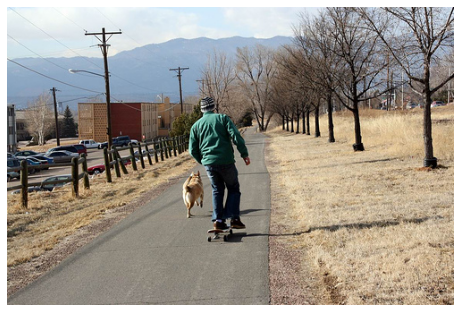

In [11]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

### Select one of image

In [12]:
# Above validation data folder was selected.
imgIds = coco.getImgIds()
len(imgIds)  

5000

In [13]:
imgIds[0:5]

[397133, 37777, 252219, 87038, 174482]

In [14]:
random_number = 2

img = coco.loadImgs(imgIds[random_number])
img

[{'license': 4,
  'file_name': '000000252219.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000252219.jpg',
  'height': 428,
  'width': 640,
  'date_captured': '2013-11-14 22:32:02',
  'flickr_url': 'http://farm4.staticflickr.com/3446/3232237447_13d84bd0a1_z.jpg',
  'id': 252219}]

In [15]:
img = coco.loadImgs(imgIds[random_number])[0]
img

{'license': 4,
 'file_name': '000000252219.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000252219.jpg',
 'height': 428,
 'width': 640,
 'date_captured': '2013-11-14 22:32:02',
 'flickr_url': 'http://farm4.staticflickr.com/3446/3232237447_13d84bd0a1_z.jpg',
 'id': 252219}

In [16]:
img['coco_url']

'http://images.cocodataset.org/val2017/000000252219.jpg'

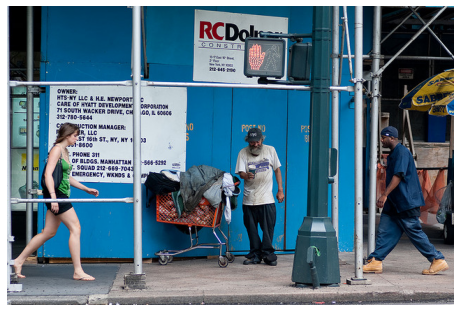

In [17]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

# Load Annotation

In [18]:
catIds

[1, 18, 41]

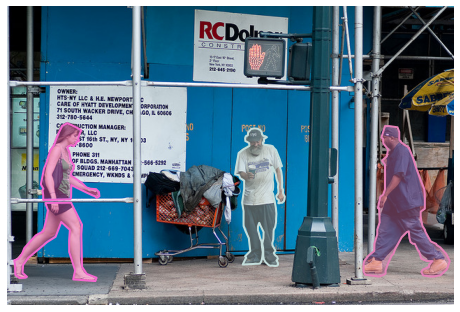

In [19]:
# load and display instance annotations with just selected categories' annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

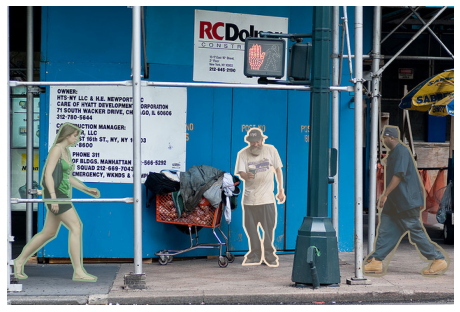

In [20]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [21]:
img

{'license': 4,
 'file_name': '000000252219.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000252219.jpg',
 'height': 428,
 'width': 640,
 'date_captured': '2013-11-14 22:32:02',
 'flickr_url': 'http://farm4.staticflickr.com/3446/3232237447_13d84bd0a1_z.jpg',
 'id': 252219}

In [22]:
annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
annIds

[481918, 489768, 495624, 1424143, 1437313, 1507017, 1804847]

In [23]:
# coco.getAnnIds??

# Keypoint Annotations

In [24]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.42s)
creating index...
index created!


In [25]:
coco_kps

img['id'] 252219
catIds [1, 18, 41]
annIds [481918, 489768, 495624]
anns [{'segmentation': [[361.81, 368.51, 337.11, 369.76, 342.14, 359.72, 340.46, 358.04, 348, 350.51, 345.9, 332.09, 341.3, 322.04, 338.37, 314.5, 338.37, 293.57, 336.27, 281.01, 339.21, 261.75, 339.21, 249.61, 333.46, 245.82, 331.8, 241.68, 326.28, 240.57, 327.66, 230.08, 330.14, 216.54, 331.25, 209.91, 338.27, 204.44, 341.82, 202.44, 346.91, 199.51, 346.14, 195.5, 343.2, 193.8, 340.89, 192.72, 340.58, 188.55, 341.51, 185.77, 344.44, 184.69, 344.75, 183.15, 344.75, 180.68, 349.22, 175.49, 353.54, 174.56, 358.48, 175.03, 362.34, 177.03, 364.34, 179.65, 364.96, 183.36, 366.97, 185.36, 369.74, 185.98, 371.9, 187.21, 367.58, 189.99, 367.74, 193.54, 365.89, 194.78, 366.19, 196.63, 368.66, 198.17, 372.21, 198.48, 377.3, 199.25, 380.24, 200.18, 381.78, 202.49, 385.02, 205.78, 387.64, 212.57, 390.11, 218.74, 392.43, 226, 393.51, 228.77, 390.27, 230.01, 392.43, 236.13, 393.35, 243.23, 393.66, 248.93, 393.66, 254.95, 393.66, 26

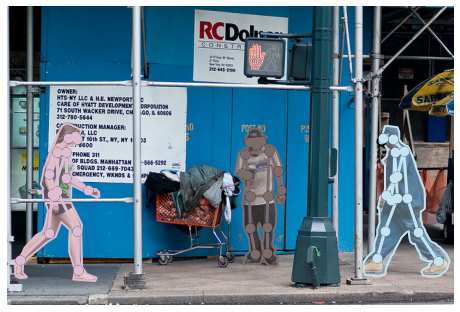

In [26]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
print("img['id']", img['id'])
print("catIds", catIds)
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
print("annIds", annIds)

anns = coco_kps.loadAnns(annIds)
print("anns", anns)
coco_kps.showAnns(anns)

## How many annotation are there?

In [27]:
print("Number of annotations:", len(anns))
print(anns[len(anns)-1])  # just selected last one

Number of annotations: 3
{'segmentation': [[576.11, 331.6, 577.82, 337.57, 581.23, 340.12, 583.79, 340.12, 588.9, 350.36, 589.76, 350.36, 593.17, 361.45, 601.7, 364.86, 609.37, 364.86, 604.25, 369.97, 604.25, 373.38, 603.4, 373.38, 595.73, 376.8, 593.17, 380.21, 595.73, 385.32, 605.96, 387.03, 611.93, 387.03, 618.75, 385.32, 620.46, 385.32, 629.84, 376.8, 634.1, 364.86, 628.99, 354.62, 620.46, 345.24, 615.34, 341.83, 614.49, 340.12, 606.81, 336.71, 599.14, 323.07, 598.28, 319.66, 594.87, 314.54, 593.17, 306.87, 592.31, 300.04, 592.31, 294.07, 598.28, 289.81, 598.28, 289.81, 598.28, 269.34, 597.43, 261.67, 587.2, 235.23, 584.64, 227.55, 581.23, 216.47, 575.26, 201.97, 570.14, 198.56, 565.02, 195.15, 561.61, 190.88, 561.61, 179.8, 559.06, 172.97, 547.12, 171.27, 541.15, 171.27, 536.03, 187.47, 538.59, 190.03, 538.59, 196, 545.41, 204.53, 543.7, 214.76, 536.88, 220.73, 541.15, 226.7, 541.15, 229.26, 541.15, 232.67, 541.15, 236.08, 541.15, 244.61, 541.15, 258.25, 541.15, 261.67, 538.59, 26

In [28]:
# there are 17 human keypoints for one person as should be.
len(anns[0]["keypoints"])/3  

17.0

In [29]:
# there are just people as an object, because we selected just this category
for i in range(len(anns)):  # how many object there are
    print(f"\n--------- {i}. object ---------")
    print(f"Keys of Annotation dictionary:{anns[i].keys()}")


--------- 0. object ---------
Keys of Annotation dictionary:dict_keys(['segmentation', 'num_keypoints', 'area', 'iscrowd', 'keypoints', 'image_id', 'bbox', 'category_id', 'id'])

--------- 1. object ---------
Keys of Annotation dictionary:dict_keys(['segmentation', 'num_keypoints', 'area', 'iscrowd', 'keypoints', 'image_id', 'bbox', 'category_id', 'id'])

--------- 2. object ---------
Keys of Annotation dictionary:dict_keys(['segmentation', 'num_keypoints', 'area', 'iscrowd', 'keypoints', 'image_id', 'bbox', 'category_id', 'id'])


In [30]:
# there are just people as an object, because we selected just this category
for i in range(len(anns)):  # how many object there are
    print(f"\n--------- {i}. object ---------")
    print(f"Number of Keypoint:{len(anns[i]['keypoints'])/3}")
    print("Keypoints \n", anns[i]["keypoints"])
    print("Bounding Box: \n", anns[i]["bbox"])


--------- 0. object ---------
Number of Keypoint:17.0
Keypoints 
 [356, 198, 2, 358, 193, 2, 351, 194, 2, 364, 192, 2, 346, 194, 2, 375, 207, 2, 341, 211, 2, 388, 236, 2, 336, 238, 2, 392, 263, 2, 343, 242, 2, 373, 271, 2, 347, 272, 2, 372, 316, 2, 348, 318, 2, 372, 353, 2, 355, 354, 2]
Bounding Box: 
 [326.28, 174.56, 71.24, 197.25]

--------- 1. object ---------
Number of Keypoint:17.0
Keypoints 
 [100, 190, 2, 0, 0, 0, 96, 185, 2, 0, 0, 0, 86, 188, 2, 84, 208, 2, 71, 208, 2, 84, 245, 2, 59, 240, 2, 115, 263, 2, 66, 271, 2, 64, 268, 2, 71, 264, 2, 59, 324, 2, 99, 322, 2, 18, 363, 2, 101, 377, 2]
Bounding Box: 
 [9.79, 167.06, 121.94, 226.45]

--------- 2. object ---------
Number of Keypoint:17.0
Keypoints 
 [536, 192, 1, 538, 188, 2, 0, 0, 0, 552, 190, 2, 0, 0, 0, 568, 207, 2, 555, 208, 2, 559, 243, 2, 554, 246, 2, 542, 270, 2, 550, 277, 2, 573, 274, 2, 559, 274, 2, 589, 323, 2, 541, 322, 2, 617, 365, 2, 530, 361, 2]
Bounding Box: 
 [510.44, 171.27, 123.66, 215.76]


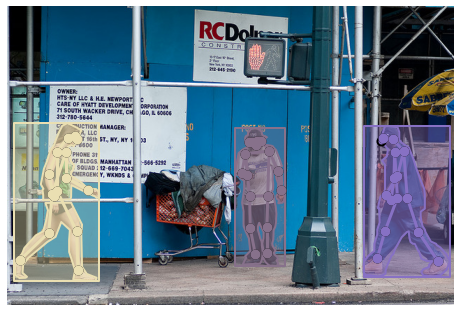

In [31]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns, draw_bbox=True)

In [32]:
# coco_kps.showAnns??

In [33]:
# assert False

## Calculate Number of Single Person for Keypoints

We have just one catIds because of just person class has keypoints.

In [34]:
# Categories were selected for images with selected categories.
catIds = coco_kps.getCatIds(catNms=['person','dog','skateboard']);
print("catIds:",catIds)

# get images id's that with selected categories
imgIds = coco_kps.getImgIds(catIds=catIds);
# print("imgIds:", imgIds)
print("length imgIds:", len(imgIds))

catIds: [1]
length imgIds: 2693


In [35]:
# Categories were selected for images with selected categories.
catIds = coco_kps.getCatIds(catNms=['person']);
print("catIds:",catIds)

# get images id's that with selected categories
imgIds = coco_kps.getImgIds(catIds=catIds);
# print("imgIds:", imgIds)
print("length imgIds:", len(imgIds))

catIds: [1]
length imgIds: 2693


In [36]:
number_of_person = 0
for Id in imgIds:
    # get annotation Id for that image
    annIds = coco_kps.getAnnIds(imgIds=Id, catIds=catIds, iscrowd=None)
    anns = coco_kps.loadAnns(annIds)
    number_of_person += len(anns)
    
print(f"There are {number_of_person} single person on images.")

There are 11004 single person on images.


### Alternative Way
Annotation number is also number of single person. Because keypoint annotations just for person in this **person_keypoints_val2017** dataset.

In [37]:
import json 

print("annFile: ", annFile)

with open(annFile, 'r') as f:
    annFile = json.load(f)

print(f"there are {len(annFile['images'])} images")
print(f"there are {len(annFile['annotations'])} single person on images")

annFile:  ../data/MSCOCO/annotations/person_keypoints_val2017.json
there are 5000 images
there are 11004 single person on images


In [38]:
import pandas as pd

df = pd.DataFrame(data=annFile['images'])
df.head()

,license,file_name,coco_url,height,width,date_captured,flickr_url,id
0,4,000000397133.jpg,http://images.cocodataset.org/val2017/00000039...,427,640,2013-11-14 17:02:52,http://farm7.staticflickr.com/6116/6255196340_...,397133
1,1,000000037777.jpg,http://images.cocodataset.org/val2017/00000003...,230,352,2013-11-14 20:55:31,http://farm9.staticflickr.com/8429/7839199426_...,37777
2,4,000000252219.jpg,http://images.cocodataset.org/val2017/00000025...,428,640,2013-11-14 22:32:02,http://farm4.staticflickr.com/3446/3232237447_...,252219
3,1,000000087038.jpg,http://images.cocodataset.org/val2017/00000008...,480,640,2013-11-14 23:11:37,http://farm8.staticflickr.com/7355/8825114508_...,87038
4,6,000000174482.jpg,http://images.cocodataset.org/val2017/00000017...,388,640,2013-11-14 23:16:55,http://farm8.staticflickr.com/7020/6478877255_...,174482


In [39]:
df = pd.DataFrame(data=annFile['annotations'])
df.head(2)

,segmentation,num_keypoints,area,iscrowd,keypoints,image_id,bbox,category_id,id
0,"[[125.12, 539.69, 140.94, 522.43, 100.67, 496....",10,47803.27955,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",425226,"[73.35, 206.02, 300.58, 372.5]",1,183126
1,"[[492.38, 238.33, 491.91, 234.15, 494.47, 227....",13,1394.74310,0,"[508, 192, 2, 510, 191, 2, 506, 191, 2, 512, 1...",440475,"[491.91, 183.51, 34.85, 73.4]",1,183302


# For Captions

In [40]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


a person with a shopping cart on a city street 
City dwellers walk by as a homeless man begs for cash.
People walking past a homeless man begging on a city street
a homeless man holding a cup and standing next to a shopping cart on a street
People are walking on the street by a homeless person.


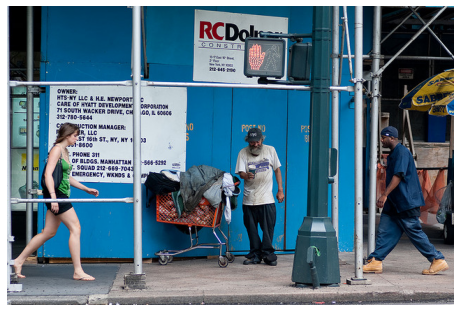

In [41]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()